In [1]:
#importing file
import numpy as np
import pandas as pd
from sklearn import tree

df=pd.read_csv("C:/Users/Ghost/Desktop/LearningML/materials/PastHires.csv",header=0)

In [2]:
#preparing data
#sklearn works on all number so
d={'Y':1,'N':0}
df['Hired']=df['Hired'].map(d)
df['Employed?']=df['Employed?'].map(d)
df['Top-tier school']=df['Top-tier school'].map(d)
df['Interned']=df['Interned'].map(d)
d={'BS':0,'MS':1,'PhD':2} 
df['Level of Education']=df['Level of Education'].map(d)
print(df.head())

   Years Experience  Employed?  Previous employers  Level of Education  \
0                10          1                   4                   0   
1                 0          0                   0                   0   
2                 7          0                   6                   0   
3                 2          1                   1                   1   
4                20          0                   2                   2   

   Top-tier school  Interned  Hired  
0                0         0      1  
1                1         1      1  
2                0         0      0  
3                1         0      1  
4                1         0      0  


In [3]:
#separating features from target column that we are trying to build a decision tree for
features=list(df.columns[:6])
print (features)

['Years Experience', 'Employed?', 'Previous employers', 'Level of Education', 'Top-tier school', 'Interned']


In [4]:
#constructing decision tree
y=df["Hired"]
x=df[features]
clf=tree.DecisionTreeClassifier()
clf=clf.fit(x,y)


[Text(0.7142857142857143, 0.9, 'X[5] <= 0.5\ngini = 0.426\nsamples = 13\nvalue = [4, 9]'), Text(0.5714285714285714, 0.7, 'X[1] <= 0.5\ngini = 0.5\nsamples = 8\nvalue = [4, 4]'), Text(0.42857142857142855, 0.5, 'X[2] <= 0.5\ngini = 0.32\nsamples = 5\nvalue = [4, 1]'), Text(0.2857142857142857, 0.3, 'X[4] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'), Text(0.14285714285714285, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'), Text(0.42857142857142855, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'), Text(0.5714285714285714, 0.3, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'), Text(0.7142857142857143, 0.5, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'), Text(0.8571428571428571, 0.7, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]')]


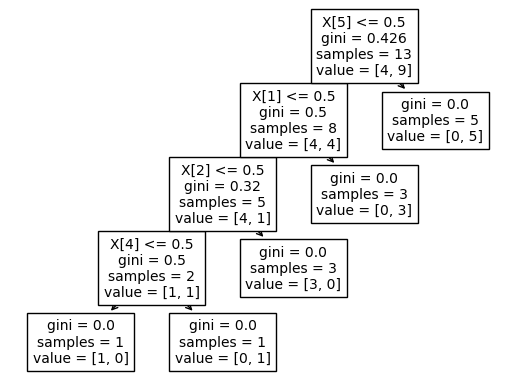

In [5]:
from sklearn import tree
from six import StringIO
dot_data=StringIO()

tree.export_graphviz(clf,out_file=dot_data,
                     feature_names=features)
print(tree.plot_tree(clf))
#[    x[0]                x[1]            x[2]                  x[3]                x[4]              x[5]]
#['Years Experience', 'Employed?', 'Previous employers', 'Level of Education', 'Top-tier school', 'Interned']

In [6]:
#Random Forest
#not workinng
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier(n_estimators=10)
clf=clf.fit(x,y)

In [7]:
#predicting on basis of Xes
print(clf.predict([1,4,1,0,0,0]))

c:\Users\Ghost\anaconda3\envs\class\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got 1D array instead:
array=[1. 4. 1. 0. 0. 0.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [8]:
import os
os.environ["PATH"] += os.pathsep +'c:\python310\lib\site-packages'


#didnt work apparantly dot not found in the path
from IPython.display import  Image
from six import StringIO
from sklearn import tree

import pydot

dot_data=StringIO()
tree.export_graphviz(clf,out_file=dot_data,
                     feature_names=features)
graph,=pydot.graph_from_dot_data(dot_data.getvalue())
print(Image(graph.create_png()))

ModuleNotFoundError: No module named 'pydot'